In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#把数据读取到data中
data = pd.read_csv("E:\俱乐部学习和任务\linear_regression\ex1data1.csv",names=['人口','利润'])
data.head()

,人口,利润
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 数据可视化



d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28070 (\N{CJK UNIFIED IDEOGRAPH-6DA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


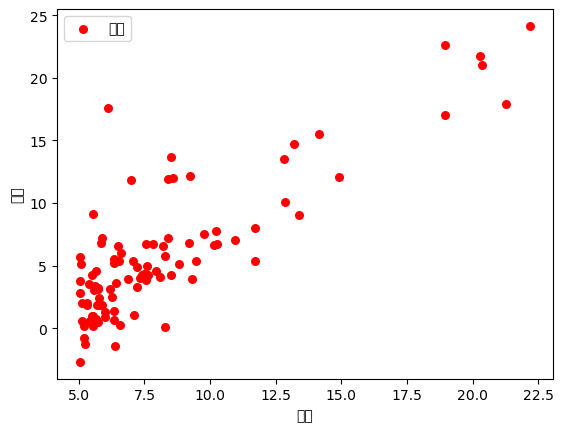

In [3]:

data.plot.scatter('人口','利润',c = 'r',label = '人口',s = 30)
plt.show()

# 构造数据集
 1. 特征集第一列全部是一，是的，特征集是一个矩阵，第一列为1使得其与数据集乘的时候得到的全是一个常数
 2. 所以要自己额外的添加一列
 3. 插入指令 DataFrame.insert(loc[插入的列索引]，column[插入的列的标签，字符串起一个名字],value[插入的值])
 4. 把特征值和标签值分开,通过切片 特征值 X = data.iloc[:,0:-1],标签值 y = data.iloc[:,-1]
 5. dataframe 转化为数组ndarray  df.values(获取数值，转成数组)，df.as.matrix() np.array(df)
 6. 把Y变成二维数组  y = y.reshape(97,1)

In [4]:
data.insert(0,'one',1)
data.head()

,one,人口,利润
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [5]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [6]:
X.values
y.values
print(X.shape)
print(y.shape)

(97, 2)
(97,)


In [7]:
y = y.to_numpy().reshape(97,1)
y.shape

(97, 1)

# 定义损失函数
损失函数


In [8]:
def CostFunction (X,y,theta) :
    inner = np.power(X @ theta -y,2)
    return np.sum(inner)/(2*len(X))

对 thate 初始化，它本身就是一个矩阵，要满足矩阵乘法的要求

In [9]:
#刚开始为0
theta = np.zeros((2,1))
theta.shape

(2, 1)

In [10]:
cost_init = CostFunction(X,y,theta)
print(cost_init)

0    32.072734
dtype: float64


# 梯度下降函数

In [11]:
def gradientDescent(X,y,theta,alpha,iters):
    costs = []
    #更新迭代
    for i in range (iters):
        theta = theta - (X.T @ (X @ theta - y))* alpha / len(X)
        cost = CostFunction(X,y,theta)
        costs.append(cost)

        if i % 100 == 0:
            print(cost)
    return theta,costs
        

In [32]:
alpha = 0.02
iters = 1
theta,costs = gradientDescent(X,y,theta,alpha,iters)

0    4.476971
dtype: float64


 绘图

[Text(0.5, 0, 'iters'),
 Text(0, 0.5, 'costs'),
 Text(0.5, 1.0, 'costs and iters')]

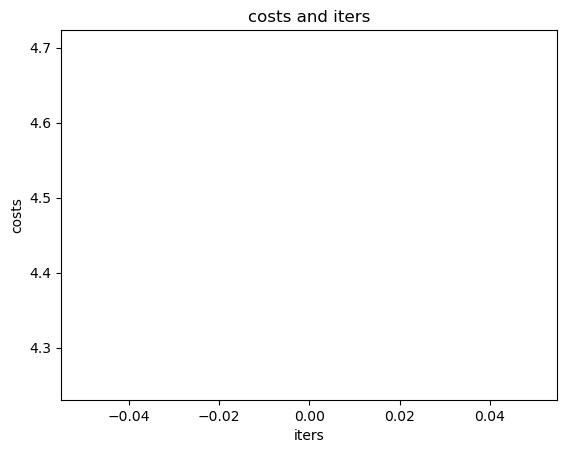

In [33]:
fig,pic = plt.subplots()
pic.plot(np.arange(iters),costs,'y',)
#定义横纵坐标
pic.set(xlabel='iters',ylabel='costs',title='costs and iters')

我们之前定义的$\theta$是二行一列的矩阵，现在我们要去画图，获取$\theta$第一行$\theta_1$ 和$\theta_2 $的值，最后函数的表达式是$y = \theta_1 + \theta_2x$

In [34]:
print(type(y), y.shape)
print(type(theta), theta.shape)
print(theta.columns)
print(theta.iloc[1,0])

<class 'numpy.ndarray'> (97, 1)
<class 'pandas.core.frame.DataFrame'> (2, 1)
RangeIndex(start=0, stop=1, step=1)
1.193033639537008


In [35]:
x = np.linspace(y.min(),y.max(),100)
y_ = theta.iloc[0,0] + theta.iloc[1,0]*x

<function matplotlib.pyplot.show(close=None, block=None)>

d:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28070 (\N{CJK UNIFIED IDEOGRAPH-6DA6}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  func(*args, **kwargs)
d:\A

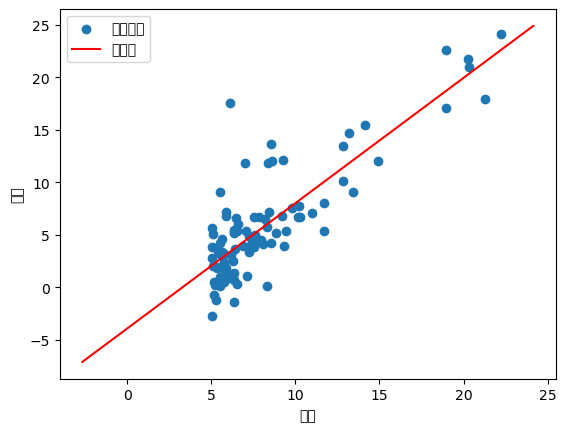

In [36]:
fig,ax = plt.subplots()
ax.scatter(X.iloc[:,1],y,label = '训练数据')
ax.plot(x,y_,'r',label = '预测值')
ax.legend()
ax.set(xlabel = '人口',ylabel ='利润')
plt.show